In [111]:
import torch
import random
import matplotlib.pyplot as plt

In [112]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.utils import subgraph

citeseer_dataset = Planetoid(root = "Citeseer_dataset", name = "Citeseer", transform = NormalizeFeatures())

In [113]:
data = citeseer_dataset[0]

# Create a mask for nodes whose label is either 0 or 1
mask = (data.y == 0) | (data.y == 1)
filtered_node_indices = mask.nonzero(as_tuple=False).view(-1)

# Extract the subgraph that contains only the filtered nodes. 
# The parameter relabel_nodes=True updates node indices accordingly.
edge_index, edge_attr = subgraph(filtered_node_indices, data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)

# Create a new data object for the filtered graph
filtered_data = data.__class__()
filtered_data.x = data.x[filtered_node_indices]
filtered_data.y = data.y[filtered_node_indices]
filtered_data.edge_index = edge_index
if hasattr(data, 'edge_attr') and data.edge_attr is not None:
    filtered_data.edge_attr = edge_attr

num_nodes = filtered_data.num_nodes
torch.manual_seed(42)
indices = torch.randperm(num_nodes)

train_end = int(0.6 * num_nodes)
val_end = int(0.8 * num_nodes)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:train_end]] = True
val_mask[indices[train_end:val_end]] = True
test_mask[indices[val_end:]] = True

filtered_data.train_mask = train_mask
filtered_data.val_mask = val_mask
filtered_data.test_mask = test_mask

filtered_citeseer_dataset = filtered_data


In [114]:
print(len(filtered_citeseer_dataset))
#print(filtered_citeseer_dataset.num_classes)
print(filtered_citeseer_dataset.num_features)
citeseer_graph = filtered_citeseer_dataset
citeseer_graph

6
3703


Data(x=[854, 3703], y=[854], edge_index=[2, 1320], train_mask=[854], val_mask=[854], test_mask=[854])

In [115]:
citeseer_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [116]:
print("Training samples: ", citeseer_graph.train_mask.sum().item())
print("Validation samples: ", citeseer_graph.val_mask.sum().item())
print("Test samples: ", citeseer_graph.test_mask.sum().item())

Training samples:  512
Validation samples:  171
Test samples:  171


In [117]:
citeseer_graph.y

tensor([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [118]:
print(f'Number of nodes: {citeseer_graph.num_nodes}')
print(f'Number of edges: {citeseer_graph.num_edges}')
print(f'Average node degree: {citeseer_graph.num_edges / citeseer_graph.num_nodes:.2f}')
print(f'Has isolated nodes: {citeseer_graph.has_isolated_nodes()}')
print(f'Has self-loops: {citeseer_graph.has_self_loops()}')
print(f'Is undirected: {citeseer_graph.is_undirected()}')

Number of nodes: 854
Number of edges: 1320
Average node degree: 1.55
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [119]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super().__init__()
        
        self.conv1 = GCNConv(in_channels = input_channels, out_channels = hidden_channels)
        self.conv2 = GCNConv(in_channels = hidden_channels, out_channels = output_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        x = F.dropout(x, training = self.training)

        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim = 1)
    

    def predict_proba(self, data):
        # forward Method: Computes the raw logits (unscaled scores) for each class.
        # predict_proba Method: Applies the softmax function to the logits to convert them into probabilities.

        # Apply softmax to get probabilities
        logits = self.forward(data)
        probabilities = F.softmax(logits, dim=1)
        return probabilities

In [120]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

citeseer_graph = filtered_citeseer_dataset.to(device)

input_channels = filtered_citeseer_dataset.num_features

hidden_channels = 32

output_channels = 2

In [121]:
model = GCN(
    input_channels = input_channels, 
    hidden_channels = hidden_channels, 
    output_channels = output_channels).to(device)

print(model)

GCN(
  (conv1): GCNConv(3703, 32)
  (conv2): GCNConv(32, 2)
)


In [122]:
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay = 5e-4)

Number of parameters:  118594


In [123]:
num_epochs = 200

for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    out = model(citeseer_graph)
    
    loss = F.nll_loss(out[citeseer_graph.train_mask], citeseer_graph.y[citeseer_graph.train_mask])
    loss.backward()
    
    optimizer.step()
    
    # Get predictions on the training data
    pred_train = out.argmax(dim = 1)
    
    correct_train = (
        pred_train[citeseer_graph.train_mask] == citeseer_graph.y[citeseer_graph.train_mask]
    ).sum()
    
    acc_train = int(correct_train) / int(citeseer_graph.train_mask.sum())

    # Get predictions on validation data
    model.eval()

    pred_val = model(citeseer_graph).argmax(dim = 1)
    
    correct_val = (
        pred_val[citeseer_graph.val_mask] == citeseer_graph.y[citeseer_graph.val_mask]
    ).sum()
    
    acc_val = int(correct_val) / int(citeseer_graph.val_mask.sum())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1:03d}, \
               Train Loss: {loss:.3f}, \
               Train Acc: {acc_train:.3f} Val Acc: {acc_val:.3f}')

Epoch: 010,                Train Loss: 0.587,                Train Acc: 0.684 Val Acc: 0.667
Epoch: 020,                Train Loss: 0.530,                Train Acc: 0.684 Val Acc: 0.667
Epoch: 030,                Train Loss: 0.484,                Train Acc: 0.684 Val Acc: 0.667
Epoch: 040,                Train Loss: 0.441,                Train Acc: 0.684 Val Acc: 0.667
Epoch: 050,                Train Loss: 0.406,                Train Acc: 0.807 Val Acc: 0.754
Epoch: 060,                Train Loss: 0.377,                Train Acc: 0.877 Val Acc: 0.807
Epoch: 070,                Train Loss: 0.347,                Train Acc: 0.908 Val Acc: 0.813
Epoch: 080,                Train Loss: 0.330,                Train Acc: 0.916 Val Acc: 0.807
Epoch: 090,                Train Loss: 0.303,                Train Acc: 0.930 Val Acc: 0.819
Epoch: 100,                Train Loss: 0.286,                Train Acc: 0.938 Val Acc: 0.836
Epoch: 110,                Train Loss: 0.267,                Train Acc

In [124]:
model.eval()

pred = model(citeseer_graph).argmax(dim = 1)

correct = (pred[citeseer_graph.test_mask] == citeseer_graph.y[citeseer_graph.test_mask]).sum()

test_acc = int(correct) / int(citeseer_graph.test_mask.sum())

test_acc

0.8070175438596491

In [125]:
# plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [126]:
from torch_geometric.utils import subgraph

# Extract test node indices from citeseer_graph
test_node_indices = citeseer_graph.test_mask.nonzero(as_tuple=False).view(-1)

# Extract a proper subgraph for test nodes with relabeled indices
test_edge_index, test_edge_attr = subgraph(test_node_indices, citeseer_graph.edge_index, relabel_nodes=True, num_nodes=citeseer_graph.num_nodes)

# Create a new test_data object with the subgraph information
test_data = citeseer_graph.__class__()
test_data.x = citeseer_graph.x[test_node_indices]
test_data.y = citeseer_graph.y[test_node_indices]
test_data.edge_index = test_edge_index
if hasattr(citeseer_graph, 'edge_attr') and citeseer_graph.edge_attr is not None:
    test_data.edge_attr = test_edge_attr

# Update num_nodes to match the filtered node features
test_data.num_nodes = test_data.x.size(0)
test_data

Data(x=[171, 3703], y=[171], edge_index=[2, 50], num_nodes=171)

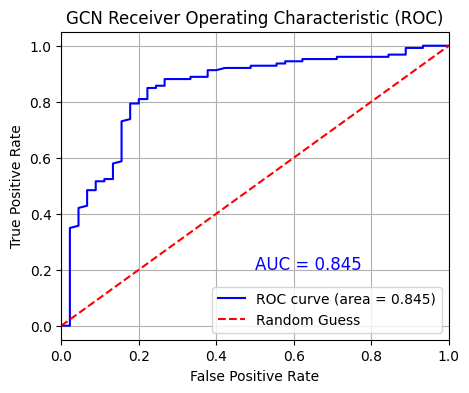

In [127]:
# Predict probabilities for the positive class
y_scores = model.predict_proba(test_data)[:, 1]
y_true = citeseer_graph.y[citeseer_graph.test_mask]

y_scores_array = y_scores.detach().numpy()
y_true_array = y_true.detach().numpy()

# plot ROC curve for the model
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    #print(fpr)  
    #rint(tpr)
    
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.3f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    # add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('GCN Receiver Operating Characteristic (ROC)')

    # add AUC value to the plot
    plt.text(0.5, 0.2, 'AUC = {:.3f}'.format(roc_auc), fontsize=12, color='blue')
    plt.legend(loc='lower right')

    plt.grid()
    
plot_roc_curve(y_true_array,y_scores_array)

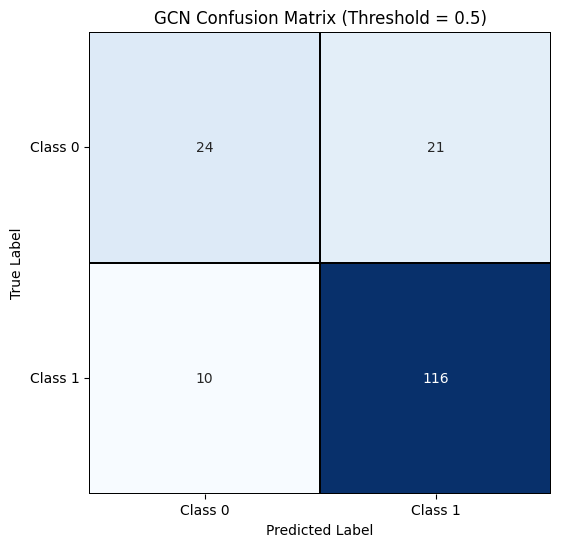

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the threshold for the positive class
threshold = 0.5

# Get probabilities for the positive class (y_scores is a tensor)
y_scores = model.predict_proba(test_data)[:, 1]
# Convert predicted probabilities tensor to numpy array after applying threshold
y_pred = (y_scores >= threshold).cpu().numpy().astype(int)

# Get true labels as a numpy array
y_true = test_data.y.cpu().numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
cm_df.index.name = 'True Label'
cm_df.columns.name = 'Predicted Label'
cm_df = cm_df.rename(index={0: 'Class 0', 1: 'Class 1'},
                     columns={0: 'Class 0', 1: 'Class 1'})

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, 
            linewidths=0.2, linecolor="black")
plt.title(f'GCN Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()